### Imports

In [1]:
from PIL import Image
from PIL import ImageFilter
import numpy as np
import copy
import matplotlib.pyplot as plt 
from numpy import linalg as LA
import scipy.io
import librosa
import IPython
from scipy import signal

### De-beeper

In [3]:
X,rate = librosa.load("D:/iu/Semester 2/MLSP/assignment2/data/x.wav",sr=None)

In [4]:
IPython.display.Audio("D:/iu/Semester 2/MLSP/assignment2/data/x.wav")

In [5]:
N = int(rate / 10)

In [6]:
def create_F(N, neg = False):
    c = -1j if neg else 1j
#     print(c)
    F = np.zeros((N,N),dtype=complex)
    for f in range(N):
        for n in range(N):
            F[f,n] = np.exp(c*(2*np.pi*f*(n/N)))
    return F

In [7]:
F = create_F(N, True)

In [8]:
window = scipy.signal.hann(N)

In [9]:
def padzero(X,N):
    X = np.append(X,np.zeros(N-(X.shape[0]%N)))
    return X

In [10]:
X = padzero(X,N)

In [11]:
inter = np.zeros((1600,79))
col = 0

for i in range(0,X.shape[0]-800,800):
    inter[:,col]=X[i:i+N]*window
    col+=1

In [12]:
spectogram = np.dot(F,inter)

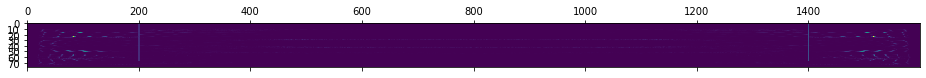

In [13]:
plt.matshow(np.abs(spectogram).T)

In [14]:
spectogram[198:201] = 0
spectogram[1400]=0

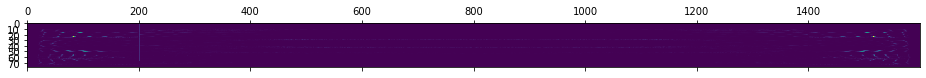

In [15]:
plt.matshow(np.abs(spectogram).T)

In [16]:
F_inv = create_F(N)

In [17]:
res = np.dot(F_inv,spectogram)/N
res = res.real

In [18]:
result = np.zeros((64000))
res = np.transpose(res)

In [19]:
i =0
for row in res:
    result[i:i+N]+=row
    i+=800

In [20]:
librosa.output.write_wav("D:/iu/Semester 2/MLSP/assignment2/data/y.wav", result, rate)

In [21]:
IPython.display.Audio("D:/iu/Semester 2/MLSP/assignment2/data/y.wav")